**Ejercicio práctico implementar una red neuronal
para regresión utilizando Keras**

  1. Importar bibliotecas

In [2]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt


  2. Cargar el conjunto de datos

In [4]:
#Cargar el conjunto de datos
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

  3. Crear conjuntos de datos de entrenamiento, validación y prueba

In [5]:
#Crear conjuntos de datos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

print ('X_train:', X_train.shape)
print ('X_test:', X_test.shape)
print ('X_valid:', X_valid.shape)
print ('y_train:', y_train.shape)
print ('y_test:', y_test.shape)
print ('y_valid:', y_valid.shape)

X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


  4. escalar los datos
   escalar significa transformar los datos para que se ajusten a una escala específica, como 0-100 o 0-1. Generalmente 0-1. Queremos escalar los datos, especialmente cuando usamos métodos basados ​​en medidas de qué tan separados están los puntos de datos.

In [6]:
#Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)


  5. Crear un modelo de red neuronal

In [7]:
#Crea un modelo de red neuronal
model = keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])

  6. compilar el modelo

In [8]:
#Compilar el modelo
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[keras.metrics.RootMeanSquaredError(),
                       'mean_absolute_percentage_error'])

  7. Entrenar el modelo

In [9]:
# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 4s 5ms/step - loss: 0.7859 - root_mean_squared_error: 0.8865 - mean_absolute_percentage_error: 36.6163 - val_loss: 0.5803 - val_root_mean_squared_error: 0.7618 - val_mean_absolute_percentage_error: 32.1194
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5479 - root_mean_squared_error: 0.7402 - mean_absolute_percentage_error: 29.9529 - val_loss: 1.1719 - val_root_mean_squared_error: 1.0825 - val_mean_absolute_percentage_error: 29.7194
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 1.9903 - root_mean_squared_error: 1.4108 - mean_absolute_percentage_error: 32.9916 - val_loss: 0.4665 - val_root_mean_squared_error: 0.6830 - val_mean_absolute_percentage_error: 28.3793
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4617 - root_mean_squared_error: 0.6795 - mean_absolute_percentage_error: 27.6077 - val_loss: 0.4289 - val_root_mean_squared_error: 0.6549 - val_

8. Graficar el historial de entrenamiento

<Axes: >

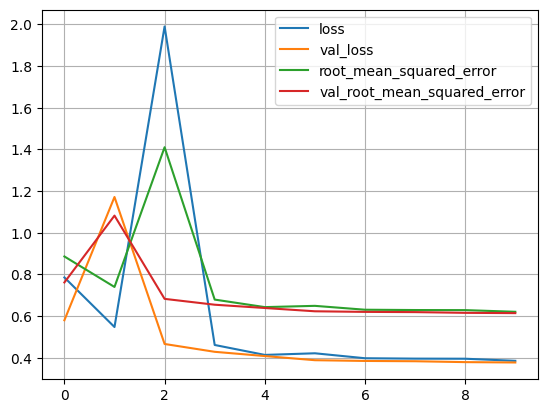

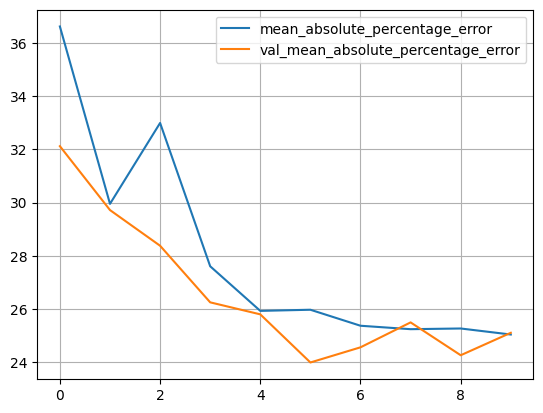

In [11]:
# Graficar el historial de entrenamiento
dfHistory = pd.DataFrame(history.history)
dfHistory [['loss', 'val_loss','root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True)
dfHistory [['mean_absolute_percentage_error',
            'val_mean_absolute_percentage_error']].plot(grid=True)


    9.Evaluar modelo

In [12]:
# Evaluar modelo
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en conjunto de entrenamiento")
print("loss train:", loss)

print("root_mean_squared_error train:", RMSE)

print("mean_absolute_percentage_error train:", MAPE)
# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en conjunto de validacion")
print("loss valid:", loss)
print("root_mean_squared error valid:", RMSE)

print("mean_absolute_percentage_error valid:", MAPE)
# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en conjunto de prueba")
print("loss test:", loss)

print("root_mean_squared_error test:", RMSE)
print("mean_absolute_percentage_error test:", MAPE)

363/363 [==============================] - 1s 2ms/step - loss: 0.3810 - root_mean_squared_error: 0.6173 - mean_absolute_percentage_error: 25.3145
Evaluar el modelo en conjunto de entrenamiento
loss train: 0.3810024857521057
root_mean_squared_error train: 0.6172539591789246
mean_absolute_percentage_error train: 25.314472198486328
121/121 [==============================] - 0s 1ms/step - loss: 0.3777 - root_mean_squared_error: 0.6146 - mean_absolute_percentage_error: 25.1098
Evaluar el modelo en conjunto de validacion
loss valid: 0.3777157664299011
root_mean_squared error valid: 0.6145858764648438
mean_absolute_percentage_error valid: 25.109783172607422
162/162 [==============================] - 0s 1ms/step - loss: 0.3700 - root_mean_squared_error: 0.6083 - mean_absolute_percentage_error: 24.6397
Evaluar el modelo en conjunto de prueba
loss test: 0.37002044916152954
root_mean_squared_error test: 0.6082930564880371
mean_absolute_percentage_error test: 24.639680862426758


PREGUNTAS

1. Qué conjunto de datos se utiliza en este
código y qué problema de aprendizaje
automático se aborda?  Regresion Lineal para modelar comportamiento de Vivienda
2. ¿Qué hace la función train_test_split() de
scikit-learn y por qué se utiliza en este
código? Permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo, para utilizar el conjunto de datos disponible en entrenamiento y bvalidacion del modelo
3. ¿Por qué es importante estandarizar los
datos antes de entrenar un modelo de
redes neuronales? para menejar una escala apropiada y facilitar los calculos
4. ¿Qué arquitectura de red neuronal se
utiliza en este código y cuántas capas
tiene?